In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import random

# Credit card fraud detection

<p style='font-size:20px'><b> 1) Real world problem </b></p>
<p>

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
       
</p>

<p style='font-size:20px'><b> 2) Dataset description </b></p>
<p>

Following are the key pointers regarding the dataset:
- The dataset contains transactions made by credit cards in September 2013 by European cardholders.
- It contains numerical input variables which are the result of a PCA transformation. Due to confidentiality issues, the original features and background information about the data were not provided.
- Features V1, V2,...., V28 are the principal components obtained from the transforming the original confidential features. 'Time' in sec & 'Amount' are two additional features provided that were not transformed with PCA.
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
</p>

<p>

Dataset/problem source link: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

</p>

In [2]:
# Load the dataset for credit card frauds
raw_data = pd.read_csv('dataset/creditcard.csv')

<p style='font-size:16px'><b> 3.1) Dataset overview </b></p>
<p>

Evaluate basic metrics regarding the data like size, number of features, class values, etc.
    
</p>


In [3]:
print("1. Number of rows (datapoints): ", raw_data.shape[0])
print("2. Number of cols (features+label): ", raw_data.shape[1])
print("\n3. Column names: ", raw_data.columns)
labels, counts = np.unique(raw_data.Class, return_counts = True)
print("\n4. Unique label values: ", labels)
print("5. Label counts: ", counts)
print("6. % of fraud transactions: {}%".format(round(100*counts[1]/(counts[0]+counts[1]),3)))
total_amount = np.sum(raw_data.Amount)
fraud_amount = np.sum(raw_data.Amount.loc[(raw_data.Class == 1)])
print("7. % of fraud transaction amount: {}%".format(round(100*fraud_amount/total_amount,3)))
print("\n8a. Total transaction amount: {}lacs".format(round(total_amount/100000, 1)))
print("8b. Fraud transactions amount: {}lacs".format(round(fraud_amount/100000, 1)))
print("\n9a. Average value of non-fraud transaction: ", round((total_amount-fraud_amount)/(raw_data.shape[0] - counts[1])))
print("9b. Average value of fraud transaction: ", round((fraud_amount)/(counts[1])))
print("\n8. Sample datapoints: ")

raw_data.iloc[np.random.randint(0,raw_data.shape[0],5)]

1. Number of rows (datapoints):  284807
2. Number of cols (features+label):  31

3. Column names:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

4. Unique label values:  [0 1]
5. Label counts:  [284315    492]
6. % of fraud transactions: 0.173%
7. % of fraud transaction amount: 0.239%

8a. Total transaction amount: 251.6lacs
8b. Fraud transactions amount: 0.6lacs

9a. Average value of non-fraud transaction:  88
9b. Average value of fraud transaction:  122

8. Sample datapoints: 


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
26811,34262.0,-0.458985,0.891794,1.556355,-0.133597,-0.135622,-0.607190,0.506126,0.160297,-0.443163,...,-0.192135,-0.597175,-0.016916,0.271820,-0.271052,0.058558,0.252186,0.107866,2.99,0
265340,161844.0,2.007679,-0.170746,-1.288866,0.282107,-0.120423,-1.041167,0.051572,-0.159438,0.544599,...,0.294228,0.908976,0.018215,0.016559,0.162281,-0.123856,-0.030160,-0.070893,5.49,0
197045,131820.0,1.992366,-0.434262,-1.472759,-0.024632,0.253354,0.010288,-0.109837,-0.022205,0.911768,...,0.108931,0.502742,-0.035064,0.256303,0.248112,0.170637,-0.041674,-0.065545,35.95,0
246400,153159.0,0.063289,1.011910,2.001672,4.390115,0.361686,1.327073,0.064264,0.127153,-1.205623,...,0.273688,1.042527,-0.132637,0.663624,-0.741510,0.429417,0.076517,-0.008711,16.63,0
8441,11324.0,-0.771922,1.037222,2.457278,1.257142,0.740127,1.563390,0.027259,0.462303,0.646801,...,-0.254586,-0.487168,-0.496858,-1.494759,0.462471,-0.075174,0.024349,0.041924,0.00,0


<p style='font-size:16px'><b> 3.2) Inferences </b></p>
<p>

1. The data is highly imbalanced, with there being only 0.173% datapoints from the positive (fraud) class label/
2. Amongst all the features, we only know what 'Time' & 'Amount' represent, so we will begin our EDA by analysing our data along these features.
    
</p>


<p style='font-size:16px'><b> 4.1) Time & Amount column </b></p>
<p>

1. The data is collected for transactions over a preiod of 2 days i.e 48 hours.
2. Plot metrics like count & amount of transaction for each hour to check relation between hour of the day & fraud transactions.
    
</p>



1. First transaction timestamp:  0.0
2. Last transaction timestamp: 47h 59m 52s



D:\Anaconda\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: invalid value encountered in true_divide


[Text(0, 0.5, 'Average transaction value'),
 Text(0.5, 0, 'Hour #'),
 Text(0.5, 1.0, 'Average transaction value vs hour')]

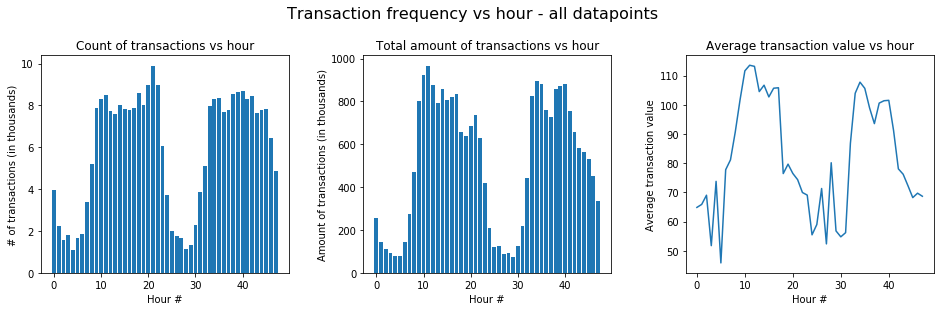

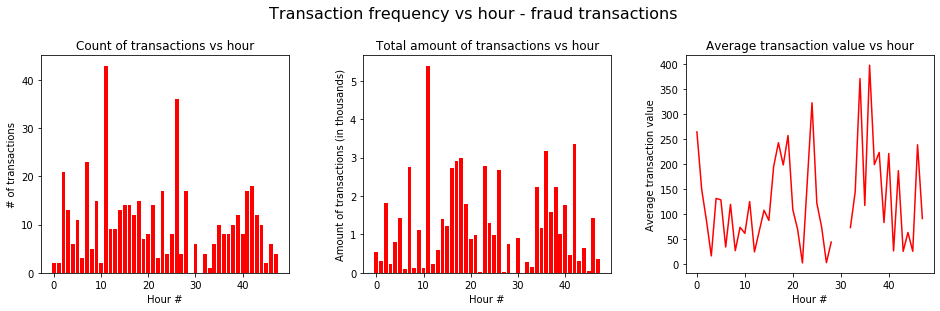

In [4]:
# Analysis of time column

def sec_to_hms(time_in_sec):
    
    h = int(time_in_sec//3600)
    m = int((time_in_sec%3600)//60)
    s = int((time_in_sec%3600)%60)
    return (h,m,s)

# Sort dataframe based on increasing timestamp
raw_data.sort_values('Time', inplace = True)
print("\n1. First transaction timestamp: ", raw_data.Time[0])
temp = sec_to_hms(raw_data.Time[raw_data.shape[0]-1])
print("2. Last transaction timestamp: {}h {}m {}s\n".format(temp[0], temp[1], temp[2]))

# Adding another feature 'Hour number' to the dataset.
# From a practical standpoint, the hour of the day should be enough to represent the time feature in credit card transactions
temp = raw_data.Time.apply(sec_to_hms)
raw_data['Hour_num'] = [x[0] for x in temp]


# Caclulate the following metrics over each hour (for all datapoints & for fraud datapoints separately)
# 1. Count of transactions
# 2. Total amount of transactions
# 3. Average value of transaction

# 1. Count of transactions
freq = np.array([np.sum((raw_data.Hour_num == i)) for i in range(48)])
freq_pos = np.array([np.sum((raw_data.Hour_num.loc[raw_data.Class == 1] == i)) for i in range(48)])

# 2. Total amount of transactions
amt_freq = np.array([np.sum(raw_data.Amount[(raw_data.Hour_num == i)]) for i in range(48)])
temp = raw_data.loc[(raw_data.Class == 1), ['Amount', 'Hour_num']]
amt_freq_pos = np.array([np.sum(temp.Amount[(temp.Hour_num == i)]) for i in range(48)])

# 3. Average value of transaction
avg_value = amt_freq/freq
avg_value_pos = amt_freq_pos/freq_pos

# Plotting the above calculated metrics vs hour num (for all datapoints & for fraud datapoints separately)

hours = np.arange(0,48,1)

# Figure1: For all datapoints
fig1 = plt.figure(figsize = (16,4))
fig1.subplots_adjust(wspace = 0.3)
fig1.suptitle('Transaction frequency vs hour - all datapoints', fontsize = 16, y = 1.05)
axs1 = fig1.subplots(1,3)

axs1[0].bar(x = hours, height = freq/1000)
axs1[0].set(xlabel = 'Hour #', ylabel = '# of transactions (in thousands)', title = 'Count of transactions vs hour')

axs1[1].bar(x = hours, height = amt_freq/1000)
axs1[1].set(xlabel = 'Hour #', ylabel = 'Amount of transactions (in thousands)', title = 'Total amount of transactions vs hour')

axs1[2].plot(hours, avg_value)
axs1[2].set(xlabel = 'Hour #', ylabel = 'Average transaction value', title = 'Average transaction value vs hour')


# Figure1: For fraud datapoints only
fig2 = plt.figure(figsize = (16,4))
fig2.subplots_adjust(wspace = 0.3)
fig2.suptitle('Transaction frequency vs hour - fraud transactions', fontsize = 16, y = 1.05)
axs2 = fig2.subplots(1,3)

axs2[0].bar(x = hours, height = freq_pos, color = 'r')
axs2[0].set(xlabel = 'Hour #', ylabel = '# of transactions', title = 'Count of transactions vs hour')

axs2[1].bar(x = hours, height = amt_freq_pos/1000, color = 'r')
axs2[1].set(xlabel = 'Hour #', ylabel = 'Amount of transactions (in thousands)', title = 'Total amount of transactions vs hour')

axs2[2].plot(hours, avg_value_pos, color = 'r')
axs2[2].set(xlabel = 'Hour #', ylabel = 'Average transaction value', title = 'Average transaction value vs hour')

<p style='font-size:16px'><b> 4.2) Inferences </b></p>
<p>

For overall data (all datapoints)
1. Most of the transactions occur approx between 9am to 10pm - the frequency of transactions for each hour in this range is almost constant.
2. The average value of transaction follows a similar trend. 

For fraud transactions:
1. There doesn't seem to be any strong co-relation between the hour (time) & the class of the datapoint.
2. We can validate this by evaluating the interpretability of the model by comparing weights for different features.
    
</p>



<p style='font-size:16px'><b> 5.1) PCA transformed features - V1, V2,...., V28 </b></p>
<p>

1. There is no information about what these features represent except that they are the principal components of some original numerical features.
    
2. Plot metrics for each feature like mean, max, min, standard deviation, accross all datapoints & then for fraud vs non-fraud datapoints separately.
    
</p>



[Text(0, 0.5, 'Feature value'),
 Text(0.5, 0, 'Feature #'),
 Text(0.5, 1.0, '2.4: Std dev')]

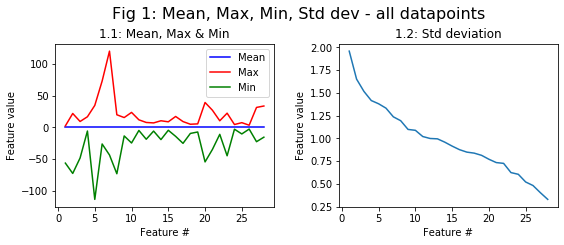

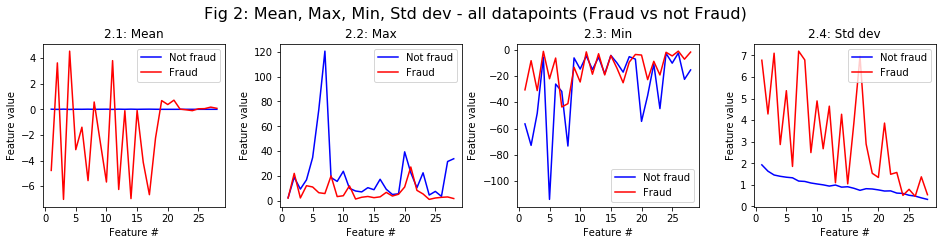

In [5]:
# Feature analysis V1,V2,....V28 - mean & std_dev

feature_data = raw_data.drop(['Time', 'Amount', 'Hour_num'], axis = 1)

# Plotting the mean, max, min & std-dev for all features
fig1 = plt.figure(figsize = (9,3))
fig1.subplots_adjust(wspace = 0.3)
fig1.suptitle('Fig 1: Mean, Max, Min, Std dev - all datapoints', fontsize = 16, y = 1.05)
axs1 = fig1.subplots(1,2)

feature_num = np.arange(1,29,1)

# Plotting the following basic metrics(Y-axis) of each feature(X-axis) accross all datapoints 
# 1.1 - Mean, max, min value (all datapoints)
# 1.2 - Standard deviation (all datapoints)
# 2.1 - Mean value: fraud vs not-fraud
# 2.2 - Max value: fraud vs not-fraud
# 2.3 - Min value: fraud vs not-fraud
# 2.4 - Standard devation: fraud vs not-fraud


# Fig 1.1
axs1[0].plot(feature_num, np.mean(feature_data, axis = 0)[:-1], color = 'b', label = 'Mean')
axs1[0].plot(feature_num, np.max(feature_data, axis = 0)[:-1], color = 'r', label = 'Max')
axs1[0].plot(feature_num, np.min(feature_data, axis = 0)[:-1], color = 'g', label = 'Min')
axs1[0].set(xlabel = 'Feature #', ylabel = 'Feature value', title = '1.1: Mean, Max & Min')
axs1[0].legend()

# Fig 1.2
axs1[1].plot(feature_num, np.std(feature_data, axis = 0)[:-1])
axs1[1].set(xlabel = 'Feature #', ylabel = 'Feature value', title = '1.2: Std deviation')

fig2 = plt.figure(figsize = (16,3))
fig2.subplots_adjust(wspace = 0.3)
fig2.suptitle('Fig 2: Mean, Max, Min, Std dev - all datapoints (Fraud vs not Fraud)', fontsize = 16, y = 1.05)
axs2 = fig2.subplots(1,4)

# Fig 2.1
axs2[0].plot(feature_num, np.mean(feature_data[(feature_data.Class == 0)], axis = 0)[:-1], color = 'b', label = 'Not fraud')
axs2[0].plot(feature_num, np.mean(feature_data[(feature_data.Class == 1)], axis = 0)[:-1], color = 'r', label = 'Fraud')
axs2[0].legend()
axs2[0].set(xlabel = 'Feature #', ylabel = 'Feature value', title = '2.1: Mean')

# Fig 2.2
axs2[1].plot(feature_num, np.max(feature_data[(feature_data.Class == 0)], axis = 0)[:-1], color = 'b', label = 'Not fraud')
axs2[1].plot(feature_num, np.max(feature_data[(feature_data.Class == 1)], axis = 0)[:-1], color = 'r', label = 'Fraud')
axs2[1].legend()
axs2[1].set(xlabel = 'Feature #', ylabel = 'Feature value', title = '2.2: Max')

# Fig 2.3
axs2[2].plot(feature_num, np.min(feature_data[(feature_data.Class == 0)], axis = 0)[:-1], color = 'b', label = 'Not fraud')
axs2[2].plot(feature_num, np.min(feature_data[(feature_data.Class == 1)], axis = 0)[:-1], color = 'r', label = 'Fraud')
axs2[2].legend()
axs2[2].set(xlabel = 'Feature #', ylabel = 'Feature value', title = '2.3: Min')

# Fig 2.4
axs2[3].plot(feature_num, np.std(feature_data[(feature_data.Class == 0)], axis = 0)[:-1], color = 'b', label = 'Not fraud')
axs2[3].plot(feature_num, np.std(feature_data[(feature_data.Class == 1)], axis = 0)[:-1], color = 'r', label = 'Fraud')
axs2[3].legend()
axs2[3].set(xlabel = 'Feature #', ylabel = 'Feature value', title = '2.4: Std dev')



<p style='font-size:16px'><b> 5.2) Inferences </b></p>
<p>

1. From Fig 1.1, the mean value for all features is 0 meaning that they are mean normalised, however the standard deviation is not 1 for all features as visible in Fig 1.2
2. From Fig 2, the basic metrics for class 'fraud' & 'not-fraud' are significantly different, implying that these would be the differentiating features for classification & the Time, Amount features would be limited for Time/Cost sensitive learning.
    
</p>



<p style='font-size:16px'><b> 6.1) Visualising the data</b></p>
<p>

- View the fraud & not-fraud datapoints on pairwise plots for any 4 features (out of 28).
- Out of the 28 features [V1, V2,...,V28], we randomly choose 4 features [V1, V18, V19, V27] for these plots.
- The same features will be used throughout as we apply models overs the data.
    
</p>



1. Feature # randomly selected:  [ 1 18 19 27]
2. Legend: 
Fraud datapoints - Red
Not fraud datapoints - Blue 


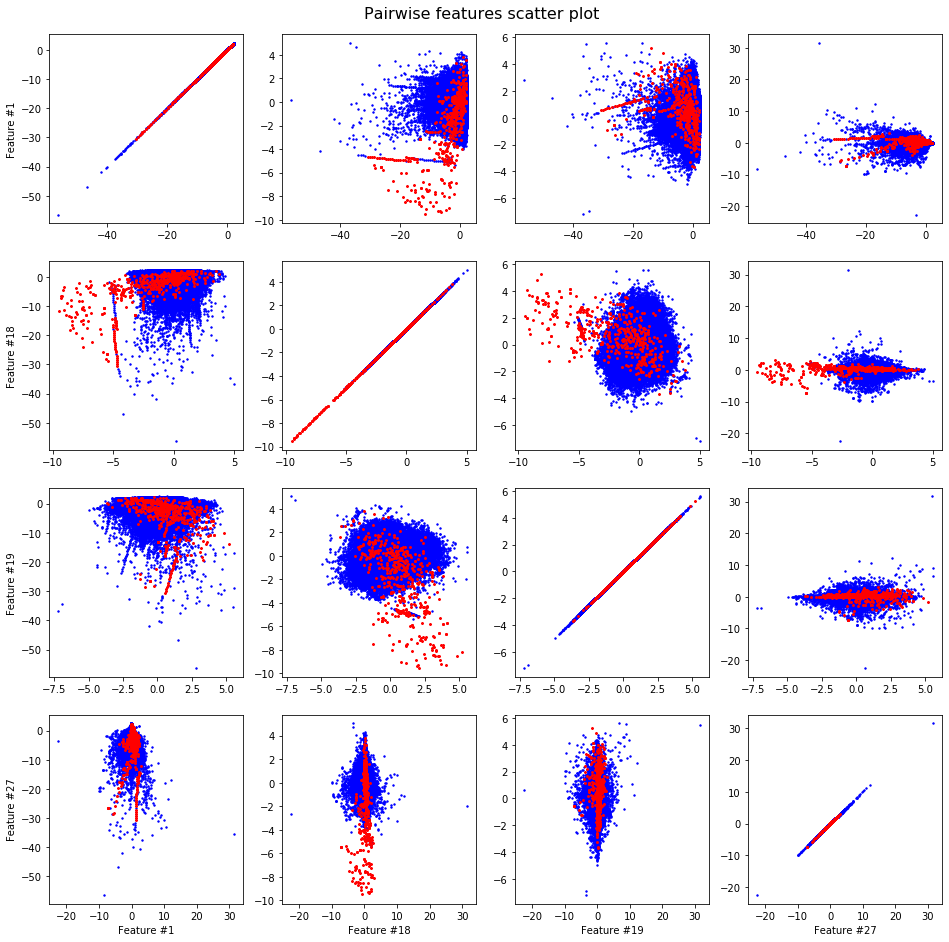

In [6]:
# Select 10 features at random and plot pair-wise scatter plot

def pairwise_plot(row, col, axs):
    
    global feature_data, feature_ind, num_features
    
    f1 = feature_ind[row]
    f2 = feature_ind[col]
    
    x = feature_data.iloc[:, f1].to_numpy()
    y = feature_data.iloc[:, f2].to_numpy()
    
    x_pos = x[(feature_data.Class == 1)]
    y_pos = y[(feature_data.Class == 1)]
    x_neg = x[(feature_data.Class == 0)]
    y_neg = y[(feature_data.Class == 0)]
    
    axs.scatter(x_neg, y_neg, label = 'Not Fraud', s = 2, c = 'b')
    axs.scatter(x_pos, y_pos, label = 'Fraud', s = 4, c = 'r', marker = 'x')

    if row == num_features-1:
        x_lab = 'Feature #' + str(f2+1)
        axs.set(xlabel = x_lab)
    if col == 0:
        y_lab = 'Feature #' + str(f1+1)
        axs.set(ylabel = y_lab)
        

# Select features at random (num_features = 4) to visualise pairwise-plots
num_features = 4
# feature_ind = np.sort(np.array(random.sample(range(28), num_features)))

# Select features in particular (num_features = 4) to visualise pairwise-plots
feature_ind = np.array([0, 17, 18, 26])

fig_size = min(16, 4*num_features)

# Setting up the pairwise plot
fig = plt.figure(figsize = (fig_size,fig_size))
fig.subplots_adjust(wspace = 0.2)
fig.suptitle('Pairwise features scatter plot', fontsize = 16, y = 0.9 + 0.001*num_features)
axs = fig.subplots(num_features,num_features)

for i in range(num_features**2):
    row = i//num_features
    col = i%num_features
    pairwise_plot(row, col, axs[row, col])

print("1. Feature # randomly selected: ", feature_ind+1)
print("2. Legend: \nFraud datapoints - Red\nNot fraud datapoints - Blue ")

<p style='font-size:16px'><b> 6.2) Inferences </b></p>
<p>

1. Using only two features at a time, there is a significant overlap between the two class labels.
2. However, there are huge/dense clusters of 'not-fraud' points that are easily separable from fraud points.
3. Also, using only two features doesn't reveal complete information regarding separability, and these plots should only be referred for basic visualisation.
    
</p>



<p style='font-size:16px'><b> 7.1) Visualising the data - Applying PCA</b></p>
<p>

- These are already PCA transformed feautures, however we will apply PCA again over these features & get the top 4 features to visualise pairwise plots.
- This won't reveal significant information here, but will be much useful in further levels of modelling.
    
</p>



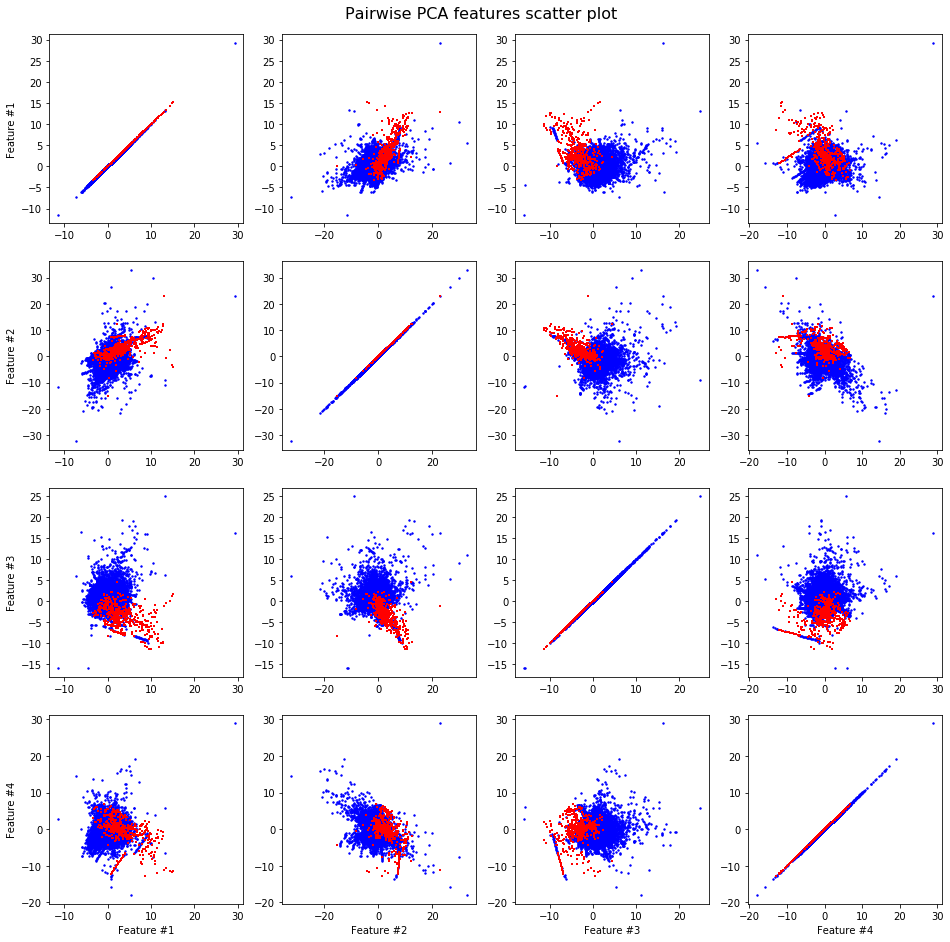

In [7]:
# Apply PCA to get top features & visualize using pair-wise plots

def pairwise_pca_plot(row, col, axs):

    global x_pca_dim, num_components, y_label
    
    x = x_pca_dim[:, col]
    y = x_pca_dim[:, row]
    
    x_pos = x[(y_label == 1)]
    y_pos = y[(y_label == 1)]
    x_neg = x[(y_label == 0)]
    y_neg = y[(y_label == 0)]

    axs.scatter(x_neg, y_neg, label = 'Not Fraud', s = 2, c = 'b')
    axs.scatter(x_pos, y_pos, label = 'Fraud', s = 4, c = 'r', marker = '+')

    if row == num_components-1:
        x_lab = 'Feature #' + str(col+1)
        axs.set(xlabel = x_lab)
    if col == 0:
        y_lab = 'Feature #' + str(row+1)
        axs.set(ylabel = y_lab)

    
# Standardizing the data - necessary for PCA
x = feature_data.iloc[:,:-1].to_numpy()
y_label = feature_data.iloc[:,-1].to_numpy()

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA - select the number of components
num_components = 4    #Imp: Don't increase this value beyond 5
pca = decomposition.PCA(n_components=num_components)
x_pca_dim = pca.fit_transform(x_scaled)

# Setting up the pairwise plot
fig_size = min(num_components*4, 16)
fig = plt.figure(figsize = (fig_size,fig_size))
fig.subplots_adjust(wspace = 0.2)
fig.suptitle('Pairwise PCA features scatter plot', fontsize = 16, y = 0.9 + 0.001*num_features)
axs = fig.subplots(num_components,num_components)

for i in range(num_components**2):
    row = i//num_components
    col = i%num_components
    pairwise_pca_plot(row, col, axs[row, col])


<p style='font-size:16px'><b> 7.2) Inferences </b></p>
<p>

1. The separability is similar to what was observed when selecting random features without applying PCA.
2. However, in some plots, a cluster of not-fraud points seems even more separable, e.g feature #2 vs feature #3
    
</p>




<p style='font-size:16px'><b> 8.1) Redundant features calculation </b></p>
<p>

1. Quite often, some features within a dataset have high covariance, making some of the dependent features redundant.
2. Eliminating them significantly boosts train & run time performance.
3. To evaluate redundant features, we will use PCA to calculate the % of variance in data (or information) explained by using different # of top features.
4. We can say that a pareto # of features exists if small # of features explain high % of variance in data.
    
</p>



1. Shape of Covar matrix:  (28, 28)
2. Number of eigen vals:  (28,)

3. Summary view of #features vs % variance explained

# of top features = 1 | % of features = 3.6% | % variance explained = 3.6%
# of top features = 4 | % of features = 14.3% | % variance explained = 14.3%
# of top features = 7 | % of features = 25.0% | % variance explained = 25.0%
# of top features = 10 | % of features = 35.7% | % variance explained = 35.7%
# of top features = 13 | % of features = 46.4% | % variance explained = 46.4%
# of top features = 16 | % of features = 57.1% | % variance explained = 57.1%
# of top features = 19 | % of features = 67.9% | % variance explained = 67.9%
# of top features = 22 | % of features = 78.6% | % variance explained = 78.6%
# of top features = 25 | % of features = 89.3% | % variance explained = 89.3%
# of top features = 28 | % of features = 100.0% | % variance explained = 100.0%


Text(0.5, 1.0, 'Feature # vs % Variance explained')

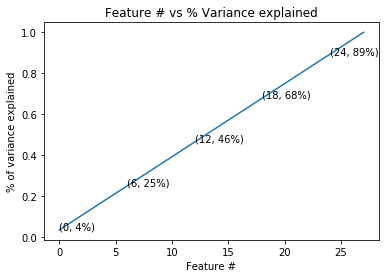

In [8]:
# Plot the graph of % variance explained vs num of PCA (Eigen) features

covar_matrix = np.matmul(x_scaled.T, x_scaled)*(1/x_scaled.shape[0])
print("1. Shape of Covar matrix: ", covar_matrix.shape)

# Calculate eigen values. Eigen vectors aren't necessary
eigen_vals, _ = eigh(covar_matrix)
eigen_vals = eigen_vals[::-1] # By default, values are ascending, make it descending
print("2. Number of eigen vals: ", eigen_vals.shape)

eigen_val_cumsum = np.cumsum(eigen_vals)
eigen_val_perc = eigen_val_cumsum/np.sum(eigen_vals)
feature_num = np.arange(0,len(eigen_vals), 1)

# Summary of pareto features & % variance explained
feature_interval = np.linspace(0, len(eigen_vals)-1, 10, dtype='int')
print("\n3. Summary view of #features vs % variance explained\n")
for i in range(len(feature_interval)):
    print("# of top features = {} | % of features = {}% | % variance explained = {}%".format(feature_interval[i]+1, round(100*(feature_interval[i]+1)/len(eigen_vals),1), round(100*eigen_val_perc[feature_interval[i]],1)))

# Plot number of features vs % variance explained
plt.plot(feature_num, eigen_val_perc)
for i in range(5):
    i_x = feature_interval[2*i]
    i_y = eigen_val_perc[feature_interval[2*i]]
    plt.text(i_x, i_y, '({}, {}%)'.format(i_x, round(100*i_y)))
    
plt.xlabel('Feature #')
plt.ylabel('% of variance explained')
plt.title('Feature # vs % Variance explained')


<p style='font-size:16px'><b> 7.2) Inferences </b></p>
<p>

1. From the summary view printed as output, the % of top features considered & the % variance explained has the same value for all values.
2. The graph between these two is also therefore a perfectly straight line.
3. This clearly implies that each feature is equally important to explain the complete variance (information) & there must be no redundant features in the dataset.     
    
</p>




<p style='font-size:20px'><b> 8) Overall conclusions </b></p>
<p>

1. The data is highly imbalanced with only 0.173% os positive (fraud) class points.
2. The features [V1, V2,..., V28] will be key to classification, whereas the 'Time' & 'Amount' features are more relevant for Time/Cost sensitive learning.     
3. The covariance between features is absent/minimal, and all features are equally important in capturing the entire information in the data.
    
</p>

<p style='font-size:20px'><b> 9) Metrics </b></p>
<p style='font-size:16px'><b> 9.1) Real world requirements </b></p>

<p>

While designing the model, there could be various business requirements of the output frauds detected as explained below:
- Case 1) We need to detect as much frauds as possible, even at the cost of flagging normal transactions as fraud. All the transactions flagged as fraud can then be verified by human intervention. Here the cost of missing out a fraud transaction would be very high.
- Case 2) If the cost of human intervention is higher than missing out a fraud transaction, the model needs to be very confident about the transactions that are flagged as fraud, so that they can be blocked/evaluated autonomously, but any normal transaction shoudn't be halted by the model.
- Case 3) A balance between Case 1 & Case 2.    

In real world applications, it is likely that Case 1 & Case 3 would be more common goals than case 2.     
</p>

<p style='font-size:16px'><b> 9.2) Model metrics </b></p>

<p>

For a highly imbalanced data, accuracy is never the preferred choice of metric for model evaluation.    
    
Translating the above cases into mathematical metrics for the model:    
- Case 1) Recall of the fraud class should be high, i.e there should be minimum False-negatives.
- Case 2) Precision of the fraud class should be high, i.e there should be minimum False-positives.
- Case 3) A balance between Case 1 & Case 2 - F1 score, AUC score should be high (the targe metric mentioned on kaggle)    

We will thereby develop a mechanism that will help us evaluate the model on each of these metrics.
    
</p>

